In [34]:
install.packages("xgboost")

package 'xgboost' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Hp\AppData\Local\Temp\RtmpamEDe4\downloaded_packages


In [35]:
library(ggplot2)
library(tidyr)
library(reshape2)
library(ggplot2)
library(dplyr)
library(magrittr)
library(caret)
library(rpart)
library(tree)
library(party)
library(RWeka)
library(randomForest)
library(ipred)
library(gbm)
library(xgboost)

Warning message:
"package 'xgboost' was built under R version 3.6.3"
Attaching package: 'xgboost'

The following object is masked from 'package:dplyr':

    slice



In [6]:
#Load data
na_value<-list('',' ','nan','Nan','NaN','na')
store<-read.csv(".\\store.csv", header = TRUE,na=na_value)
train<-read.csv(".\\train.csv", header = TRUE)

In [7]:
head(train,10)

Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1,5,2015-07-31,5263,555,1,1,0,1
2,5,2015-07-31,6064,625,1,1,0,1
3,5,2015-07-31,8314,821,1,1,0,1
4,5,2015-07-31,13995,1498,1,1,0,1
5,5,2015-07-31,4822,559,1,1,0,1
6,5,2015-07-31,5651,589,1,1,0,1
7,5,2015-07-31,15344,1414,1,1,0,1
8,5,2015-07-31,8492,833,1,1,0,1
9,5,2015-07-31,8565,687,1,1,0,1
10,5,2015-07-31,7185,681,1,1,0,1


In [8]:
head(store,10)

Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1,c,a,1270,9,2008,0,NA,NA,NA
2,a,a,570,11,2007,1,13,2010,"Jan,Apr,Jul,Oct"
3,a,a,14130,12,2006,1,14,2011,"Jan,Apr,Jul,Oct"
4,c,c,620,9,2009,0,NA,NA,NA
5,a,a,29910,4,2015,0,NA,NA,NA
6,a,a,310,12,2013,0,NA,NA,NA
7,a,c,24000,4,2013,0,NA,NA,NA
8,a,a,7520,10,2014,0,NA,NA,NA
9,a,c,2030,8,2000,0,NA,NA,NA
10,a,a,3160,9,2009,0,NA,NA,NA


In [12]:
data<-merge(train,store)

In [10]:
head(data)

Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270,9,2008,0,NA,NA,NA
1,6,2013-01-12,4952,646,1,0,0,0,c,a,1270,9,2008,0,NA,NA,NA
1,5,2014-01-03,4190,552,1,0,0,1,c,a,1270,9,2008,0,NA,NA,NA
1,3,2014-12-03,6454,695,1,1,0,0,c,a,1270,9,2008,0,NA,NA,NA
1,3,2013-11-13,3310,464,1,0,0,0,c,a,1270,9,2008,0,NA,NA,NA
1,7,2013-10-27,0,0,0,0,0,0,c,a,1270,9,2008,0,NA,NA,NA


In [11]:
print("Shape of the Dataset:")
dim(train)
print("Shape of the Merged Dataset:")
dim(data)

[1] "Shape of the Dataset:"


[1] 1017209       9

[1] "Shape of the Merged Dataset:"


[1] 1017209      18

In [ ]:
library("plyr")
count_store<-count(data, 'Store')
print('Distinct number of Stores :')
length(count_store$Store)

In [9]:
summary(data)

     Store          DayOfWeek             Date             Sales      
 Min.   :   1.0   Min.   :1.000   2013-01-02:   1115   Min.   :    0  
 1st Qu.: 280.0   1st Qu.:2.000   2013-01-03:   1115   1st Qu.: 3727  
 Median : 558.0   Median :4.000   2013-01-04:   1115   Median : 5744  
 Mean   : 558.4   Mean   :3.998   2013-01-05:   1115   Mean   : 5774  
 3rd Qu.: 838.0   3rd Qu.:6.000   2013-01-06:   1115   3rd Qu.: 7856  
 Max.   :1115.0   Max.   :7.000   2013-01-07:   1115   Max.   :41551  
                                  (Other)   :1010519                  
   Customers           Open            Promo        StateHoliday
 Min.   :   0.0   Min.   :0.0000   Min.   :0.0000   0:986159    
 1st Qu.: 405.0   1st Qu.:1.0000   1st Qu.:0.0000   a: 20260    
 Median : 609.0   Median :1.0000   Median :0.0000   b:  6690    
 Mean   : 633.1   Mean   :0.8301   Mean   :0.3815   c:  4100    
 3rd Qu.: 837.0   3rd Qu.:1.0000   3rd Qu.:1.0000               
 Max.   :7388.0   Max.   :1.0000   Max.   

In [10]:
str(data,stringsAsFactors = FALSE)

'data.frame':	1017209 obs. of  18 variables:
 $ Store                    : int  1 1 1 1 1 1 1 1 1 1 ...
 $ DayOfWeek                : int  5 6 5 3 3 7 3 1 5 1 ...
 $ Date                     : Factor w/ 942 levels "2013-01-01","2013-01-02",..: 942 12 368 702 317 300 891 266 249 840 ...
 $ Sales                    : int  5263 4952 4190 6454 3310 0 3591 4770 3836 3722 ...
 $ Customers                : int  555 646 552 695 464 0 453 542 466 480 ...
 $ Open                     : int  1 1 1 1 1 0 1 1 1 1 ...
 $ Promo                    : int  1 0 0 1 0 0 0 1 0 0 ...
 $ StateHoliday             : Factor w/ 4 levels "0","a","b","c": 1 1 1 1 1 1 1 1 1 1 ...
 $ SchoolHoliday            : int  1 0 1 0 0 0 0 0 0 0 ...
 $ StoreType                : Factor w/ 4 levels "a","b","c","d": 3 3 3 3 3 3 3 3 3 3 ...
 $ Assortment               : Factor w/ 3 levels "a","b","c": 1 1 1 1 1 1 1 1 1 1 ...
 $ CompetitionDistance      : int  1270 1270 1270 1270 1270 1270 1270 1270 1270 1270 ...
 $ CompetitionOpen

In [11]:
count_holiday<-count(data['StateHoliday'])
count_holiday

StateHoliday,freq
0,986159
a,20260
b,6690
c,4100


In [76]:
head(data)

Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270,9,2008,0,NA,NA,NA
1,6,2013-01-12,4952,646,1,0,0,0,c,a,1270,9,2008,0,NA,NA,NA
1,5,2014-01-03,4190,552,1,0,0,1,c,a,1270,9,2008,0,NA,NA,NA
1,3,2014-12-03,6454,695,1,1,0,0,c,a,1270,9,2008,0,NA,NA,NA
1,3,2013-11-13,3310,464,1,0,0,0,c,a,1270,9,2008,0,NA,NA,NA
1,7,2013-10-27,0,0,0,0,0,0,c,a,1270,9,2008,0,NA,NA,NA


In [3]:
a<-quarters(as.Date('2015-07-31'))
a

[1] "Q3"

In [13]:
data['months']<- months(as.Date(data$Date))

In [14]:
data['months']<- match(data$months,month.name)
head(data)

Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,months
1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270,9,2008,0,NA,NA,NA,7
1,6,2013-01-12,4952,646,1,0,0,0,c,a,1270,9,2008,0,NA,NA,NA,1
1,5,2014-01-03,4190,552,1,0,0,1,c,a,1270,9,2008,0,NA,NA,NA,1
1,3,2014-12-03,6454,695,1,1,0,0,c,a,1270,9,2008,0,NA,NA,NA,12
1,3,2013-11-13,3310,464,1,0,0,0,c,a,1270,9,2008,0,NA,NA,NA,11
1,7,2013-10-27,0,0,0,0,0,0,c,a,1270,9,2008,0,NA,NA,NA,10


In [15]:
data['Day']<-weekdays(as.Date(data$Date))

In [16]:
library(dplyr)


data$Day <- recode(data$Day, 
       "Sunday"=0,
       "Monday"=1,
       "Tuesday"=2,
       "Wednesday"=3,
       "Thursday"=4,
       "Friday"=5,
       "Saturday"=6)

In [17]:
data['Quarter']<-quarters(as.Date(data$Date))
data$Quarter <- recode(data$Quarter,
                   "Q1"=1,
                   "Q2"=2,
                   "Q3"=3,
                      "Q4"=4)

In [18]:
getSeason <- function(DATES) {
    WS <- as.Date("2012-12-15", format = "%Y-%m-%d") # Winter Solstice
    SE <- as.Date("2012-3-15",  format = "%Y-%m-%d") # Spring Equinox
    SS <- as.Date("2012-6-15",  format = "%Y-%m-%d") # Summer Solstice
    FE <- as.Date("2012-9-15",  format = "%Y-%m-%d") # Fall Equinox

    # Convert dates from any year to 2012 dates
    d <- as.Date(strftime(DATES, format="2012-%m-%d"))

    ifelse (d >= WS | d < SE, "Winter",
      ifelse (d >= SE & d < SS, "Spring",
        ifelse (d >= SS & d < FE, "Summer", "Fall")))
}

data['Season']<-getSeason(data$Date)

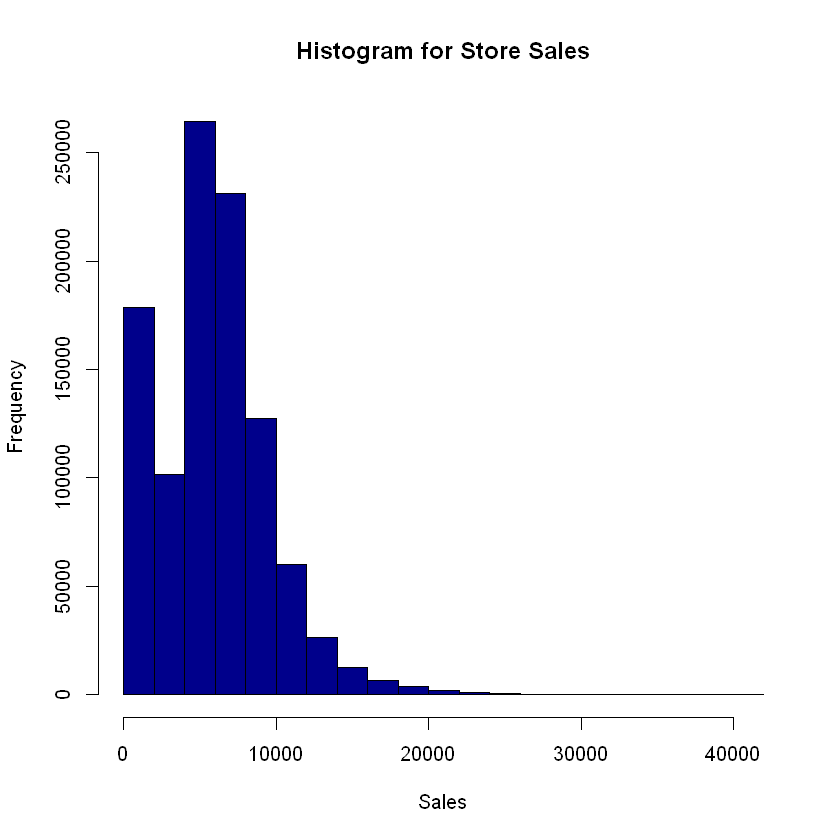

In [55]:
hist(data$Sales,xlab="Sales",ylab="Frequency",main="Histogram for Store Sales",col=c("darkblue"))

The histogram helps us understand the distribution of the data at a high level. From the plot, we can see that the data range is from 0 to 40,000, but there is barely any data after 20,000. This indicates that most of the stores have sales in the range 0–20,000, and just a few stores have sales greater than 20,000. It might be worthwhile to remove these outliers, as it helps the model learn better.

Warning message:
"package 'reshape2' was built under R version 3.6.3"
Attaching package: 'reshape2'

The following object is masked from 'package:tidyr':

    smiths

Using Date, StateHoliday, StoreType, Assortment, PromoInterval, Seaason, Season as id variables
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"Removed 1665400 rows containing non-finite values (stat_bin)."

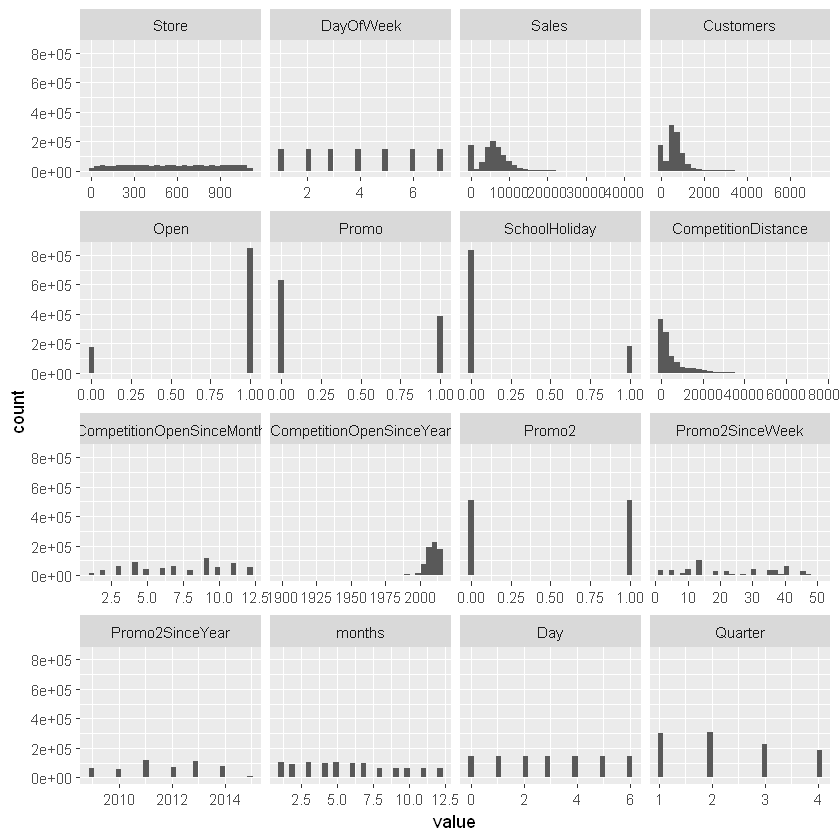

In [73]:

d <- melt(data)
ggplot(d,aes(x = value)) + 
    facet_wrap(~variable,scales = "free_x") + 
    geom_histogram()

We can see that the features Promo, Promo2, School Holiday, and Open are actually binary categorical features: they represent two possible values similar to gender: Male or Female. Therefore, these are actually categorical features but already encoded as numeric columns. This is great; we won’t need to further process them, as machine learning models understand only numeric values. Promo2 is well distributed between the two distinct values, whereas Promo has more records for ‘1’ and Open has most of the store records as ‘1’. The distribution between the values for ‘Open’ makes sense, as the stores will be open for most days except state holidays. Customer numbers range from 0 to 2,000 for most stores. A few stores have as many as 7000 daily customers, but these are outliers and we might need to fix them before modeling.The next set of numeric variables are Promo2SinceWeek and Promo2SinceYear; these show a relatively well-distributed feature.

Warning message:
"`fun.y` is deprecated. Use `fun` instead."

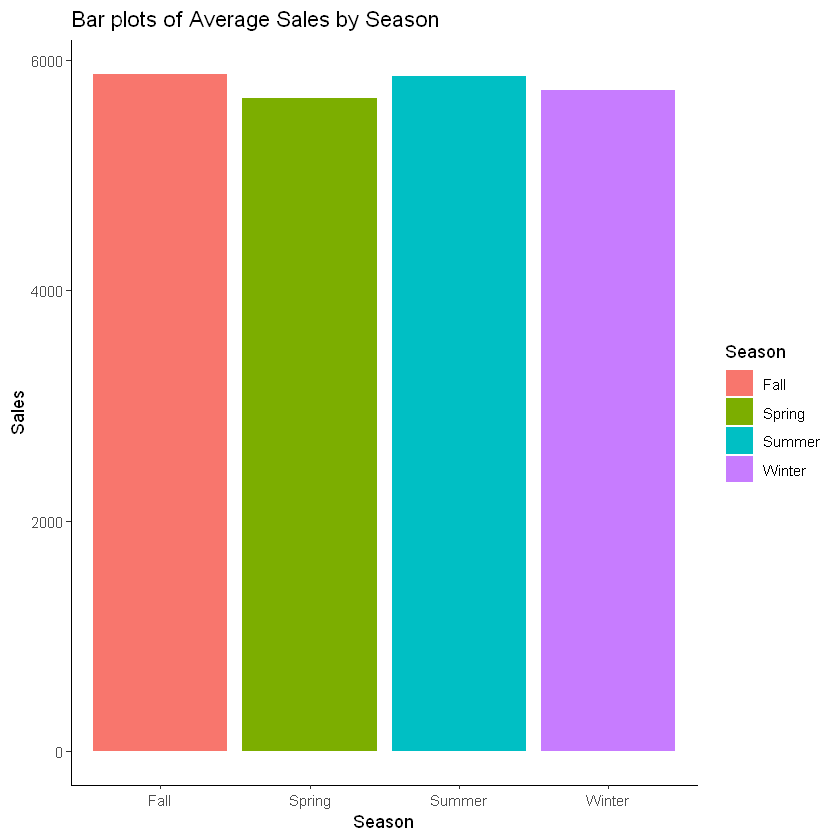

In [83]:
ggplot(aes(x = Season, y = Sales, fill = Season), data = data) + stat_summary(fun.y = "mean", geom = "bar")+
    theme_classic() +
    labs(
        x = "Season",
        y = "Average Sales",
        title = paste(
            "Bar plots of Average Sales by Season"
        )
    )

Sales across seasons barely seem to differ

Warning message:
"`fun.y` is deprecated. Use `fun` instead."

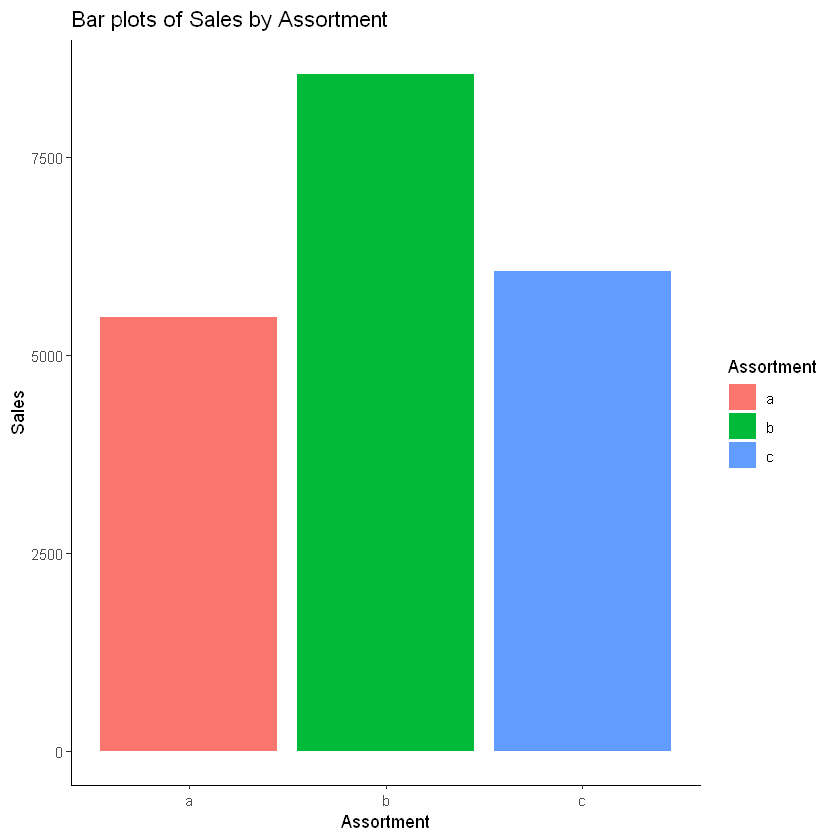

In [74]:
ggplot(aes(x = Assortment, y = Sales, fill = Assortment), data = data) + stat_summary(fun.y = "mean", geom = "bar")+
    theme_classic() +
    labs(
        x = "Assortment",
        y = "Average Sales",
        title = paste(
            "Bar plots of Sales by Assortment"
        )
    )

There seems to be an increasing trend for sales across
assortments. Stores with assortment “b” generally have the highest sales. However, further investigation is required to cheeck for skewness of the data.

Warning message:
"`fun.y` is deprecated. Use `fun` instead."

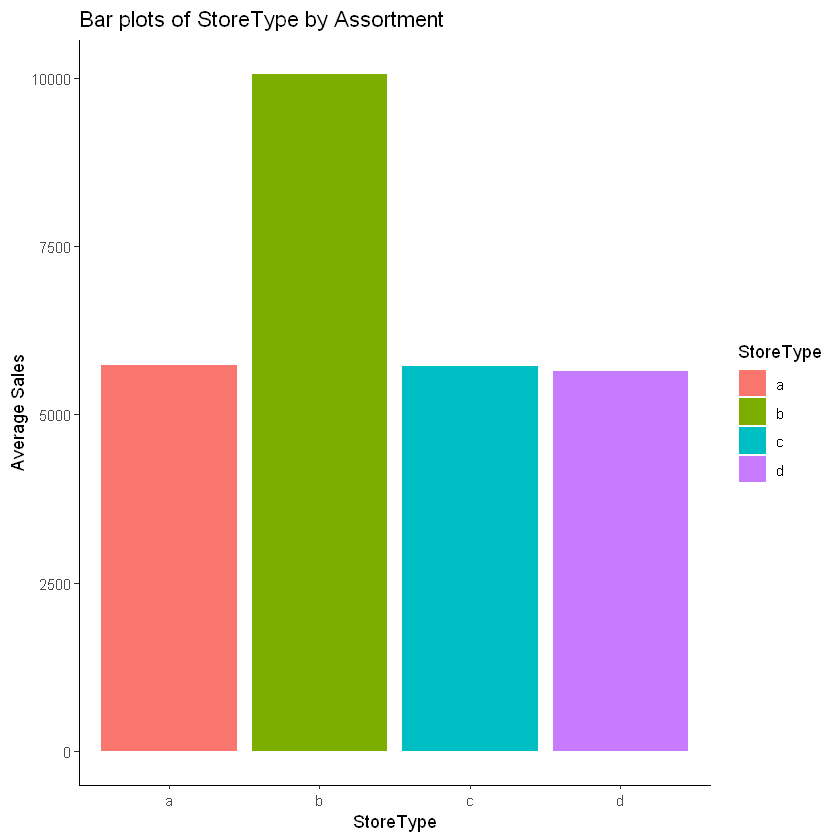

In [84]:
ggplot(aes(x = StoreType, y = Sales, fill = StoreType), data = data) + stat_summary(fun.y = "mean", geom = "bar")+
    theme_classic() +
    labs(
        x = "StoreType",
        y = "Average Sales",
        title = paste(
            "Bar plots of StoreType by Assortment"
        )
    )

Store type also shows a unique relationship with sales across store types. We can see fairly higher sales for “b” store types also.


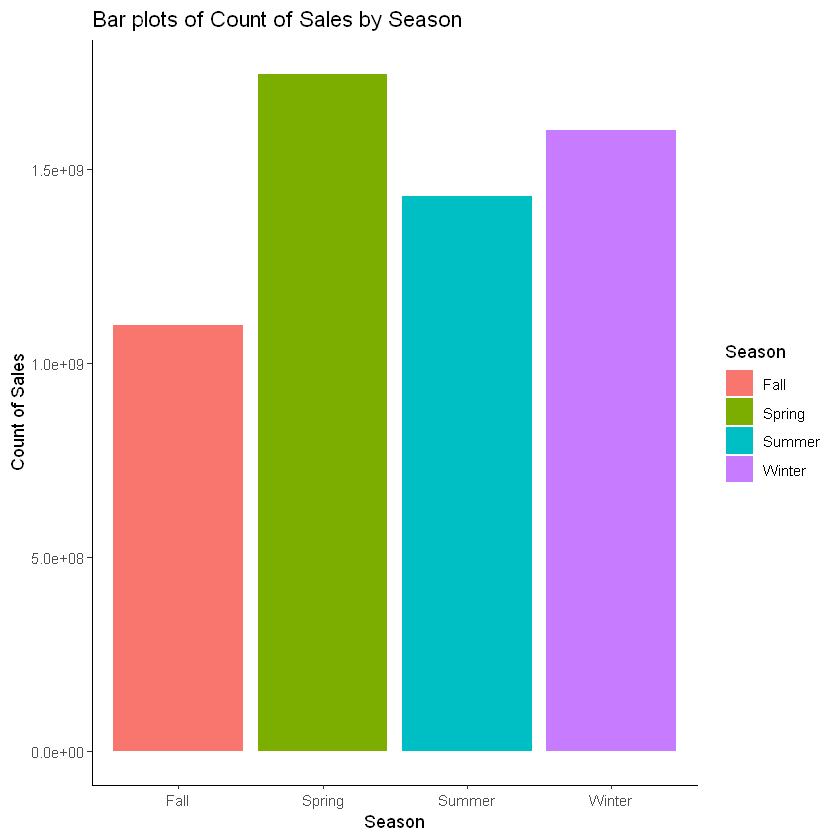

In [99]:
ggplot(aes(x = Season, y = Sales, fill = Season), data = data) + 
    geom_bar(stat = "identity") +
    theme_classic() +
    labs(
        x = "Season",
        y = "Count of Sales",
        title = paste(
            "Bar plots of Count of Sales by Season"
        )
    )

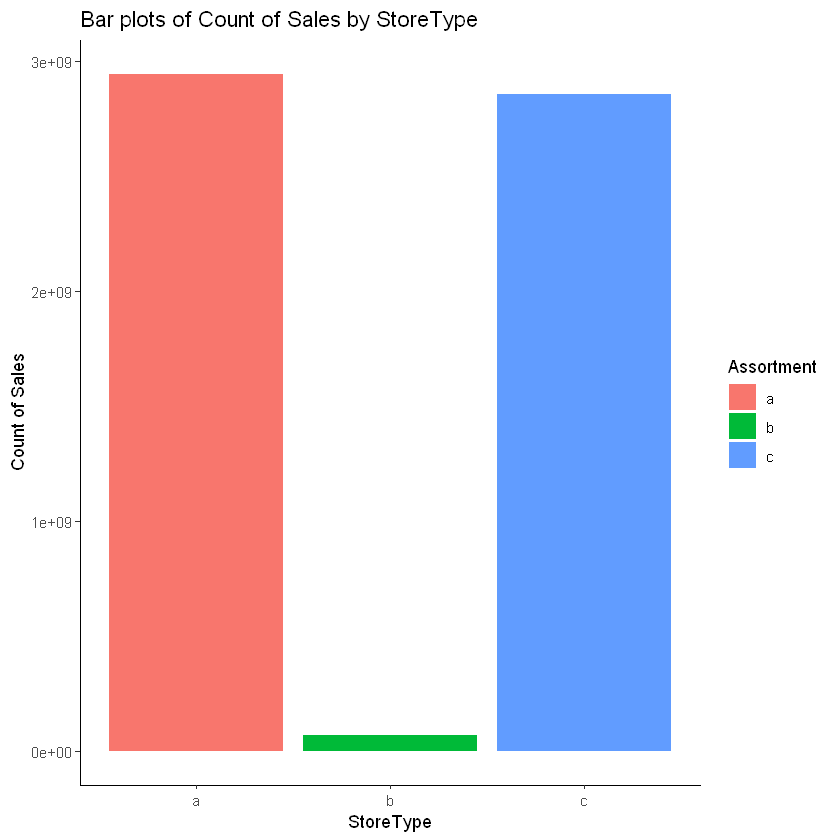

In [102]:
ggplot(aes(x = Assortment, y = Sales, fill = Assortment), data = data) + 
    geom_bar(stat = "identity") +
    theme_classic() +
    labs(
        x = "StoreType",
        y = "Count of Sales",
        title = paste(
            "Bar plots of Count of Sales by StoreType"
        )
    )

We can notice that the distribution of data points across different classes within a category is skewed. A simple check on StoreType and Assortment reveals that b has a significantly lower number of stores or data points in the dataset. Therefore, our initial understanding of the relationships observed is not true.

Warning message:
"`fun.y` is deprecated. Use `fun` instead."

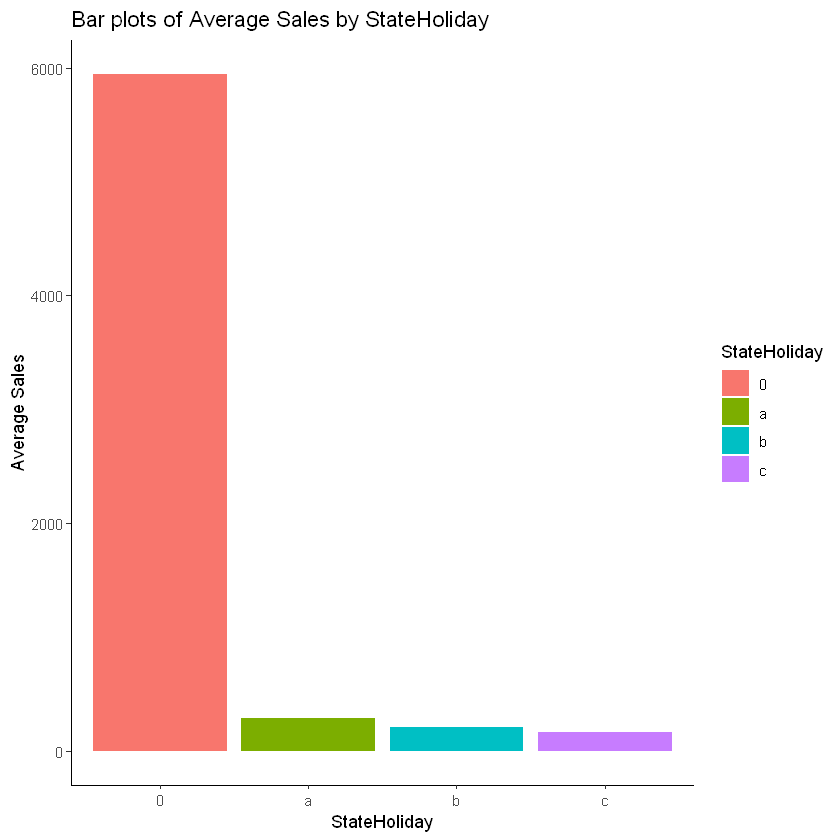

In [103]:
ggplot(aes(x = StateHoliday, y = Sales, fill = StateHoliday), data = data) + stat_summary(fun.y = "mean", geom = "bar")+
    theme_classic() +
    labs(
        x = "StateHoliday",
        y = "Average Sales",
        title = paste(
            "Bar plots of Average Sales by StateHoliday"
        )
    )

Warning message:
"`fun.y` is deprecated. Use `fun` instead."

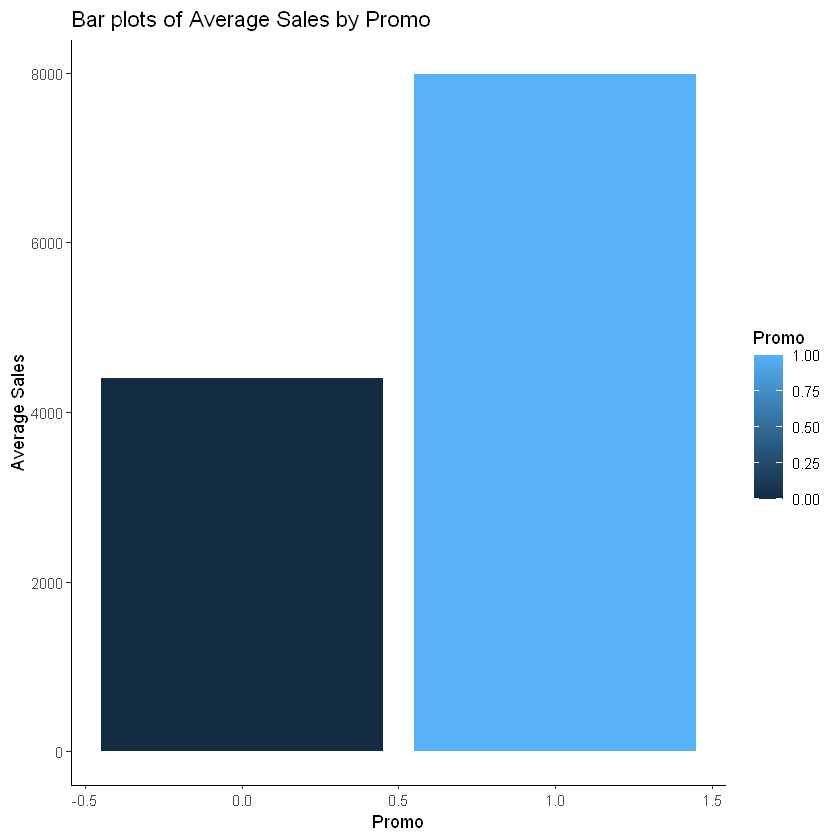

In [104]:

ggplot(aes(x = Promo, y = Sales, fill = Promo), data = data) + stat_summary(fun.y = "mean", geom = "bar")+
    theme_classic() +
    labs(
        x = "Promo",
        y = "Average Sales",
        title = paste(
            "Bar plots of Average Sales by Promo"
        )
    )

In [19]:
# Handling missing data
(sapply(data, function(x) sum(is.na (x))))*100/dim(data)[1]

Store                 DayOfWeek                      Date 
                0.0000000                 0.0000000                 0.0000000 
                    Sales                 Customers                      Open 
                0.0000000                 0.0000000                 0.0000000 
                    Promo              StateHoliday             SchoolHoliday 
                0.0000000                 0.0000000                 0.0000000 
                StoreType                Assortment       CompetitionDistance 
                0.0000000                 0.0000000                 0.2597303 
CompetitionOpenSinceMonth  CompetitionOpenSinceYear                    Promo2 
               31.7877644                31.7877644                 0.0000000 
          Promo2SinceWeek           Promo2SinceYear             PromoInterval 
               49.9436202                49.9436202                49.9436202 
                   months                       Day                   Quarter 
                0.0000000                 0.0000000                 0.0000000 
                   Season 
                0.0000000

We drop features with gretaer than 30 percent missing data

In [20]:
i<-'CompetitionDistance'
data[is.na(data[,i]), i] <- mean(data[,i], na.rm = TRUE)
data$Date <- NULL

In [21]:
#Drop columns
data_new<-data[!sapply(data, function(x) any(is.na(x)))]


In [22]:

head(data_new)

Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,months,Day,Quarter,Season
1,5,5263,555,1,1,0,1,c,a,1270,0,7,5,3,Summer
1,6,4952,646,1,0,0,0,c,a,1270,0,1,6,1,Winter
1,5,4190,552,1,0,0,1,c,a,1270,0,1,5,1,Winter
1,3,6454,695,1,1,0,0,c,a,1270,0,12,3,4,Fall
1,3,3310,464,1,0,0,0,c,a,1270,0,11,3,4,Fall
1,7,0,0,0,0,0,0,c,a,1270,0,10,0,4,Fall


stateholiday should have 0 or 1, to indicate if there is holiday or not

In [23]:
data_new$StateHoliday <- recode(data_new$StateHoliday, 
         "0"=0,                   
        "a"=1,
        "b"=1,
        "c"=1)
data_new

Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,months,Day,Quarter,Season
1,5,5263,555,1,1,0,1,c,a,1270,0,7,5,3,Summer
1,6,4952,646,1,0,0,0,c,a,1270,0,1,6,1,Winter
1,5,4190,552,1,0,0,1,c,a,1270,0,1,5,1,Winter
1,3,6454,695,1,1,0,0,c,a,1270,0,12,3,4,Fall
1,3,3310,464,1,0,0,0,c,a,1270,0,11,3,4,Fall
1,7,0,0,0,0,0,0,c,a,1270,0,10,0,4,Fall
1,3,3591,453,1,0,0,0,c,a,1270,0,6,3,2,Spring
1,1,4770,542,1,1,0,0,c,a,1270,0,9,1,3,Fall
1,5,3836,466,1,0,0,0,c,a,1270,0,9,5,3,Summer
1,1,3722,480,1,0,0,0,c,a,1270,0,4,1,2,Spring


In [24]:
data_new$Season <- recode(data_new$Season, 
         "Summer"=0,                   
        "Winter"=1,
        "Fall"=2,
        "Spring"=3)

In [25]:
data_new$StoreType<- as.numeric(data_new$StoreType)


In [26]:
#One hot encoding
dmy <- dummyVars(" ~ .", data = data_new)
data_ohe <- data.frame(predict(dmy, newdata = data_new))


## implementing decision tree for prediction

In [46]:
1017209-712046

[1] 305163

In [27]:
set.seed(101)
train=sample(1:nrow(data_ohe), 712046)


In [38]:
head(data_ohe[train,])

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment.a,Assortment.b,Assortment.c,CompetitionDistance,Promo2,months,Day,Quarter,Season
527161,578,2,9022,823,1,1,0,1,4,1,0,0,12700,0,3,2,1,3
895071,982,6,5616,496,1,0,0,0,4,1,0,0,21930,0,2,6,1,1
412881,453,6,8857,1128,1,0,0,0,1,0,0,1,75860,0,5,6,2,3
611679,672,3,8860,1341,1,1,0,1,3,1,0,0,240,0,8,3,3,0
822204,902,7,0,0,0,0,0,0,1,1,0,0,310,1,10,0,4,2
701686,771,1,5269,588,1,0,0,0,1,1,0,0,20640,0,9,1,3,2


In [49]:
tree.data_ohe = tree(Sales~., data_ohe, subset=train)

In [50]:
summary(tree.data_ohe)


Regression tree:
tree(formula = Sales ~ ., data = data_ohe, subset = train)
Variables actually used in tree construction:
[1] "Customers"
Number of terminal nodes:  6 
Residual mean deviance:  2837000 = 2.02e+12 / 712000 
Distribution of residuals:
     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-10030.00   -930.70    -22.84      0.00    684.30  27560.00 

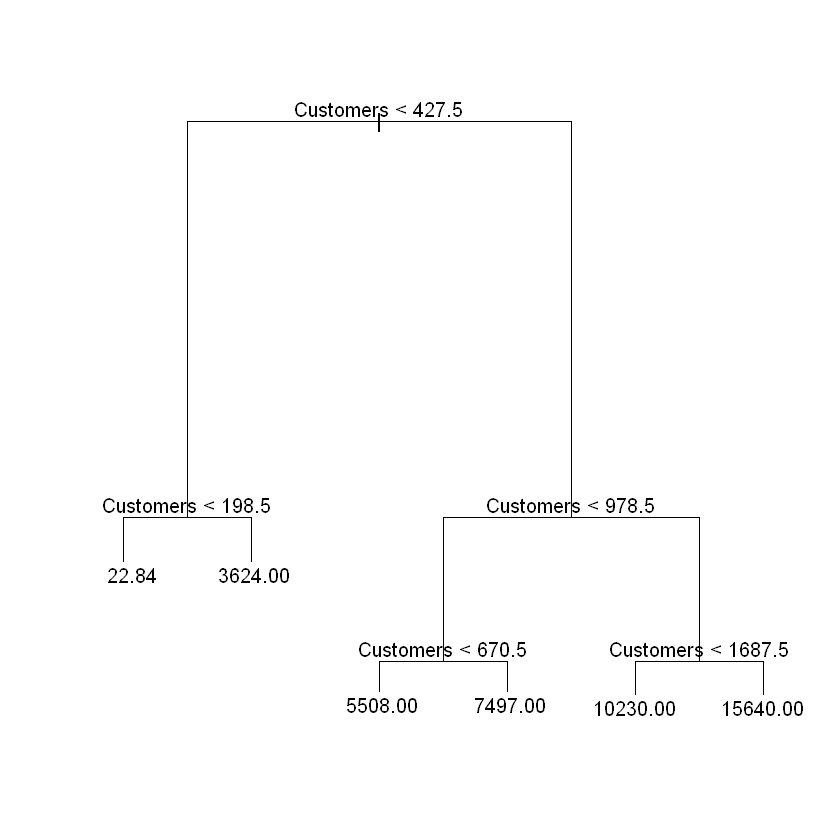

In [51]:
plot(tree.data_ohe)
text(tree.data_ohe, pretty = 0)

In [54]:
fit <- rpart(Sales~., data=data_ohe,subset=train)
# summarize the fit
summary(fit)
# make predictions
predictions <- predict(fit, data_ohe[-train,])
# summarize accuracy
mse <- mean((data_ohe[-train]$Sales - predictions)^2)
print(mse)

Call:
rpart(formula = Sales ~ ., data = data_ohe, subset = train)
  n= 712046 

          CP nsplit rel error    xerror         xstd
1 0.49492346      0 1.0000000 1.0000019 0.0023045684
2 0.18009503      1 0.5050765 0.5051680 0.0017152960
3 0.05480775      2 0.3249815 0.3253250 0.0010245031
4 0.04131814      3 0.2701738 0.2703941 0.0010265816
5 0.03788555      4 0.2288556 0.2290851 0.0007483962
6 0.01000000      5 0.1909701 0.1912368 0.0006811867

Variable importance
   Customers         Open    DayOfWeek          Day StateHoliday Assortment.b 
          44           20           16           16            3            1 

Node number 1: 712046 observations,    complexity param=0.4949235
  mean=5776.885, MSE=1.485663e+07 
  left son=2 (193180 obs) right son=3 (518866 obs)
  Primary splits:
      Customers < 427.5  to the left,  improve=0.4949235, (0 missing)
      Open      < 0.5    to the left,  improve=0.4596231, (0 missing)
      DayOfWeek < 6.5    to the right, improve=0.3466631, (

Warning message in data_ohe[-train]$Sales - predictions:
"longer object length is not a multiple of shorter object length"

[1] 26986903


In [ ]:

fit <- M5P(Sales~., data=data_ohe,subset=train)
# summarize the fit
summary(fit)
# make predictions
predictions <- predict(fit, data_ohe[-train,])
# summarize accuracy
mse <- mean((data_ohe[-train]$Sales - predictions)^2)
print(mse)

In [ ]:
fit <- M5Rules(Sales~., data=data_ohe,subset=train)
# summarize the fit
summary(fit)
# make predictions
predictions <- predict(fit, data_ohe[-train,])
# summarize accuracy
mse <- mean((data_ohe[-train]$Sales - predictions)^2)
print(mse)

In [32]:
fit <- bagging(Sales~., data=data_ohe,subset=train)
# summarize the fit
summary(fit)
# make predictions
predictions <- predict(fit, data_ohe[-train,])
# summarize accuracy
mse <- mean((data_ohe[-train]$Sales - predictions)^2)
print(mse)

       Length Class      Mode   
y      712046 -none-     numeric
X          17 data.frame list   
mtrees     25 -none-     list   
OOB         1 -none-     logical
comb        1 -none-     logical
call        4 -none-     call   

Warning message in data_ohe[-train]$Sales - predictions:
"longer object length is not a multiple of shorter object length"

[1] 26893718


In [33]:

fit <- randomForest(Sales~., data=data_ohe,subset=train)
# summarize the fit
summary(fit)
# make predictions
predictions <- predict(fit, data_ohe[-train,])
# summarize accuracy
mse <- mean((data_ohe[-train]$Sales - predictions)^2)
print(mse)

ERROR: Error: cannot allocate vector of size 2.7 Gb


In [ ]:

fit <- gbm(Sales~., data=data_ohe,subset=train,distribution="gaussian")
# summarize the fit
summary(fit)
# make predictions
predictions <- predict(fit, data_ohe[-train,])
# summarize accuracy
mse <- mean((data_ohe[-train]$Sales - predictions)^2)
print(mse)

In [ ]:
# for reproducibility
set.seed(123)

# train GBM model
gbm.fit <- gbm(
  formula = Sales ~ .,
  distribution = "gaussian",
  data = data_ohe[train,],
  n.trees = 1000,
  interaction.depth = 1,
  shrinkage = 0.001,
  cv.folds = 5,
  n.cores = NULL, # will use all cores by default
  verbose = FALSE
  )  

# print results
print(gbm.fit)

In [ ]:
# get MSE and compute RMSE
sqrt(min(gbm.fit$cv.error))




In [ ]:
# plot loss function as a result of n trees added to the ensemble
gbm.perf(gbm.fit, method = "cv")

In [42]:
train=data_ohe[train,]
test=data_ohe[-train]
# variable names
features <- setdiff(names(train), "Sales")

# Create the treatment plan from the training data
treatplan <- vtreat::designTreatmentsZ(train, features, verbose = FALSE)

# Get the "clean" variable names from the scoreFrame
new_vars <- treatplan %>%
  magrittr::use_series(scoreFrame) %>%        
  dplyr::filter(code %in% c("clean", "lev")) %>% 
  magrittr::use_series(varName)     

# Prepare the training data
features_train <- vtreat::prepare(treatplan, train, varRestriction = new_vars) %>% as.matrix()
response_train <- ames_train$Sale_Price

# Prepare the test data
features_test <- vtreat::prepare(treatplan, test, varRestriction = new_vars) %>% as.matrix()
response_test <- ames_test$Sale_Price

# dimensions of one-hot encoded data
print(dim(features_train))
dim(features_test)

[1] 81

In [ ]:
# reproducibility
set.seed(123)

xgb.fit1 <- xgb.cv(
  data = features_train,
  label = response_train,
  nrounds = 1000,
  nfold = 5,
  objective = "reg:linear",  # for regression models
  verbose = 0               # silent,
)

In [ ]:
# get number of trees that minimize error
xgb.fit1$evaluation_log %>%
  dplyr::summarise(
    ntrees.train = which(train_rmse_mean == min(train_rmse_mean))[1],
    rmse.train   = min(train_rmse_mean),
    ntrees.test  = which(test_rmse_mean == min(test_rmse_mean))[1],
    rmse.test   = min(test_rmse_mean),
  )
##   ntrees.train rmse.train ntrees.test rmse.test
## 1          965  0.5022836          60  27572.31

# plot error vs number trees
ggplot(xgb.fit1$evaluation_log) +
  geom_line(aes(iter, train_rmse_mean), color = "red") +
  geom_line(aes(iter, test_rmse_mean), color = "blue")

In [ ]:
# reproducibility
set.seed(123)

xgb.fit2 <- xgb.cv(
  data = features_train,
  label = response_train,
  nrounds = 1000,
  nfold = 5,
  objective = "reg:linear",  # for regression models
  verbose = 0,               # silent,
  early_stopping_rounds = 10 # stop if no improvement for 10 consecutive trees
)

# plot error vs number trees
ggplot(xgb.fit2$evaluation_log) +
  geom_line(aes(iter, train_rmse_mean), color = "red") +
  geom_line(aes(iter, test_rmse_mean), color = "blue")

In [ ]:
# create parameter list
  params <- list(
    eta = .1,
    max_depth = 5,
    min_child_weight = 2,
    subsample = .8,
    colsample_bytree = .9
  )

# reproducibility
set.seed(123)

# train model
xgb.fit3 <- xgb.cv(
  params = params,
  data = features_train,
  label = response_train,
  nrounds = 1000,
  nfold = 5,
  objective = "reg:linear",  # for regression models
  verbose = 0,               # silent,
  early_stopping_rounds = 10 # stop if no improvement for 10 consecutive trees
)

# assess results
xgb.fit3$evaluation_log %>%
  dplyr::summarise(
    ntrees.train = which(train_rmse_mean == min(train_rmse_mean))[1],
    rmse.train   = min(train_rmse_mean),
    ntrees.test  = which(test_rmse_mean == min(test_rmse_mean))[1],
    rmse.test   = min(test_rmse_mean),
  )

In [ ]:
# create hyperparameter grid
hyper_grid <- expand.grid(
  eta = c(.01, .05, .1, .3),
  max_depth = c(1, 3, 5, 7),
  min_child_weight = c(1, 3, 5, 7),
  subsample = c(.65, .8, 1), 
  colsample_bytree = c(.8, .9, 1),
  optimal_trees = 0,               # a place to dump results
  min_RMSE = 0                     # a place to dump results
)

In [ ]:
# grid search 
for(i in 1:nrow(hyper_grid)) {
  
  # create parameter list
  params <- list(
    eta = hyper_grid$eta[i],
    max_depth = hyper_grid$max_depth[i],
    min_child_weight = hyper_grid$min_child_weight[i],
    subsample = hyper_grid$subsample[i],
    colsample_bytree = hyper_grid$colsample_bytree[i]
  )
  
  # reproducibility
  set.seed(123)
  
  # train model
  xgb.tune <- xgb.cv(
    params = params,
    data = features_train,
    label = response_train,
    nrounds = 5000,
    nfold = 5,
    objective = "reg:linear",  # for regression models
    verbose = 0,               # silent,
    early_stopping_rounds = 10 # stop if no improvement for 10 consecutive trees
  )
  
  # add min training error and trees to grid
  hyper_grid$optimal_trees[i] <- which.min(xgb.tune$evaluation_log$test_rmse_mean)
  hyper_grid$min_RMSE[i] <- min(xgb.tune$evaluation_log$test_rmse_mean)
}

hyper_grid %>%
  dplyr::arrange(min_RMSE) %>%
  head(10)